### Problem Statement

#### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
#### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [986]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading and Understanding the data.

In [987]:
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [988]:
leads_data.shape

(9240, 37)

In [989]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [990]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [991]:
((leads_data.isnull().sum()/leads_data.shape[0]) * 100).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [992]:
leads_data = leads_data.drop(columns = ['Lead Quality'])

In [993]:
leads_data = leads_data.drop(['Lead Profile', 'Last Notable Activity', 'Last Activity', 'Tags', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [994]:
((leads_data.isnull().sum()/leads_data.shape[0]) * 100).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [995]:
leads_data['Specialization'] = leads_data.Specialization.fillna("Missing values")
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].fillna("Missing values")
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna("Missing values")
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].fillna("Missing values")
leads_data['City'] = leads_data.City.fillna("Missing values")
leads_data['Country'] = leads_data.Country.fillna("Missing values")

In [996]:
a = list(leads_data.columns)
b=['Select']
lst=[]
for i in range(len(a)):
    if len(leads_data[a[i]].isin(b).unique())>1:
        lst.append(a[i])
lst

['Specialization', 'How did you hear about X Education', 'City']

In [997]:
leads_data["Specialization"] = leads_data["Specialization"].replace({"Select" : "Missing values"})
leads_data["How did you hear about X Education"] = leads_data["How did you hear about X Education"].replace({"Select" : "Missing values"})
leads_data["City"] = leads_data["City"].replace({"Select" : "Missing values"})

In [998]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [999]:
((leads_data.isnull().sum()/leads_data.shape[0]) * 100).round(2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [1000]:
leads_data = leads_data.dropna()
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

#### Outliers

In [1001]:
leads_data.describe(percentiles = [.25, .5, .75,  .90, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


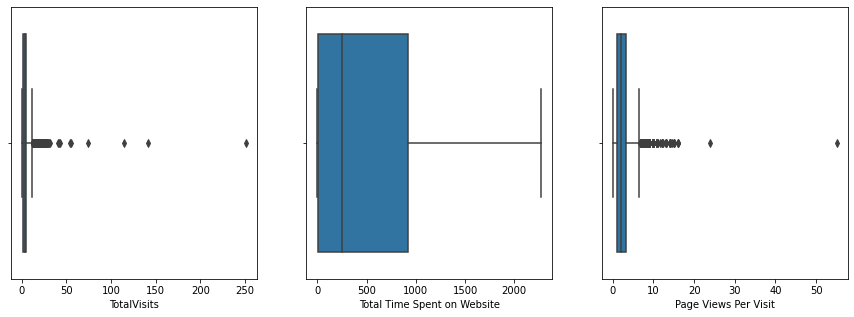

In [1002]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=leads_data.TotalVisits)
plt.subplot(1,3,2)
sns.boxplot(x=leads_data["Total Time Spent on Website"])
plt.subplot(1,3,3)
sns.boxplot(x=leads_data["Page Views Per Visit"])
plt.show()

In [1003]:
leads_data["TotalVisits"].value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [1004]:
leads_data["Total Time Spent on Website"].value_counts()

0       2165
60        19
127       18
75        18
234       17
        ... 
580        1
620        1
628        1
684        1
1975       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

### Data Preparation.

In [1005]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,Missing values,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,Missing values,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No


In [1006]:
leads_data = leads_data.drop(["Prospect ID"], axis=1)

In [1007]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Country                                        9074 

In [1008]:
leads_data["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [1009]:
leads_data = leads_data.drop(['What matters most to you in choosing a course', 'Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [1010]:
for column in leads_data:
    print(leads_data[column].astype('object').value_counts(), end = "\n\n\n\n")

655360    1
600761    1
633515    1
584366    1
598940    1
         ..
592698    1
618841    1
626281    1
627983    1
620768    1
Name: Lead Number, Length: 9074, dtype: int64



Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64



Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
testone                 1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64



No     8358
Yes     716
Name: Do Not Email, dtype: int64



No     9072
Yes

In [1011]:
def country(x):
    label = ""
    if x == "India":
        label = "India"
    elif x == "Missing values":
        label = "Missing values"
    else:
        label = "Other Countries"
    return label
leads_data['Country'] = leads_data.apply(lambda x:country(x['Country']), axis = 1)
leads_data['Country'].value_counts()

India              6491
Missing values     2296
Other Countries     287
Name: Country, dtype: int64

### Exploratory Data Analysis

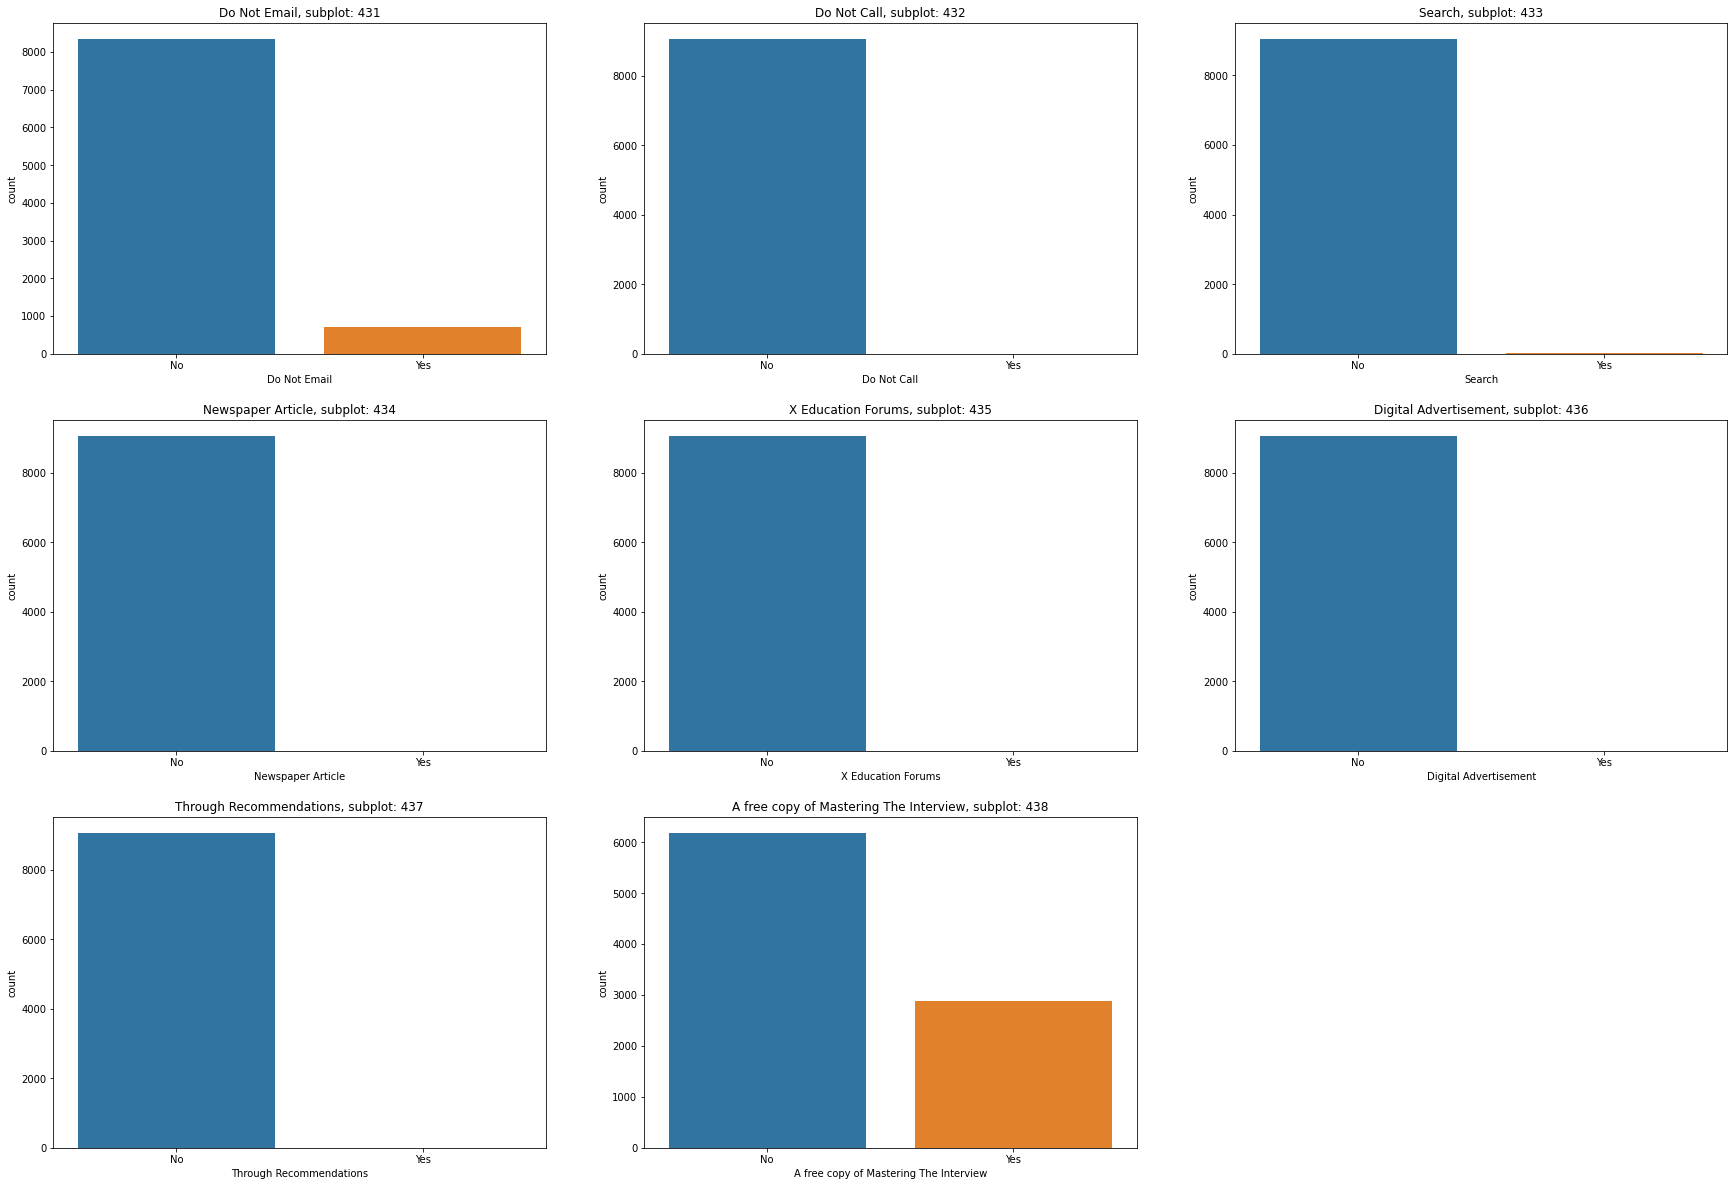

In [1012]:
cat_columns = ["Do Not Email", "Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Digital Advertisement", "Through Recommendations", "A free copy of Mastering The Interview"]
a = 4
b = 3
c = 1
fig = plt.figure(figsize=(30,28))
for i in cat_columns:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(leads_data[i])
    c = c + 1    
plt.show()

#### From the above plots we can say that the leads have opted "No" in maximum percentage to the above recommendations by the company.
#### In the features like "Do Not Email", "Do Not Call" almost all leads opted for "No".
#### In features regarding how they got to know about this institution, they opted "No" for all the options.
#### Only for free copy of mastering interview column have some rate of "Yes".

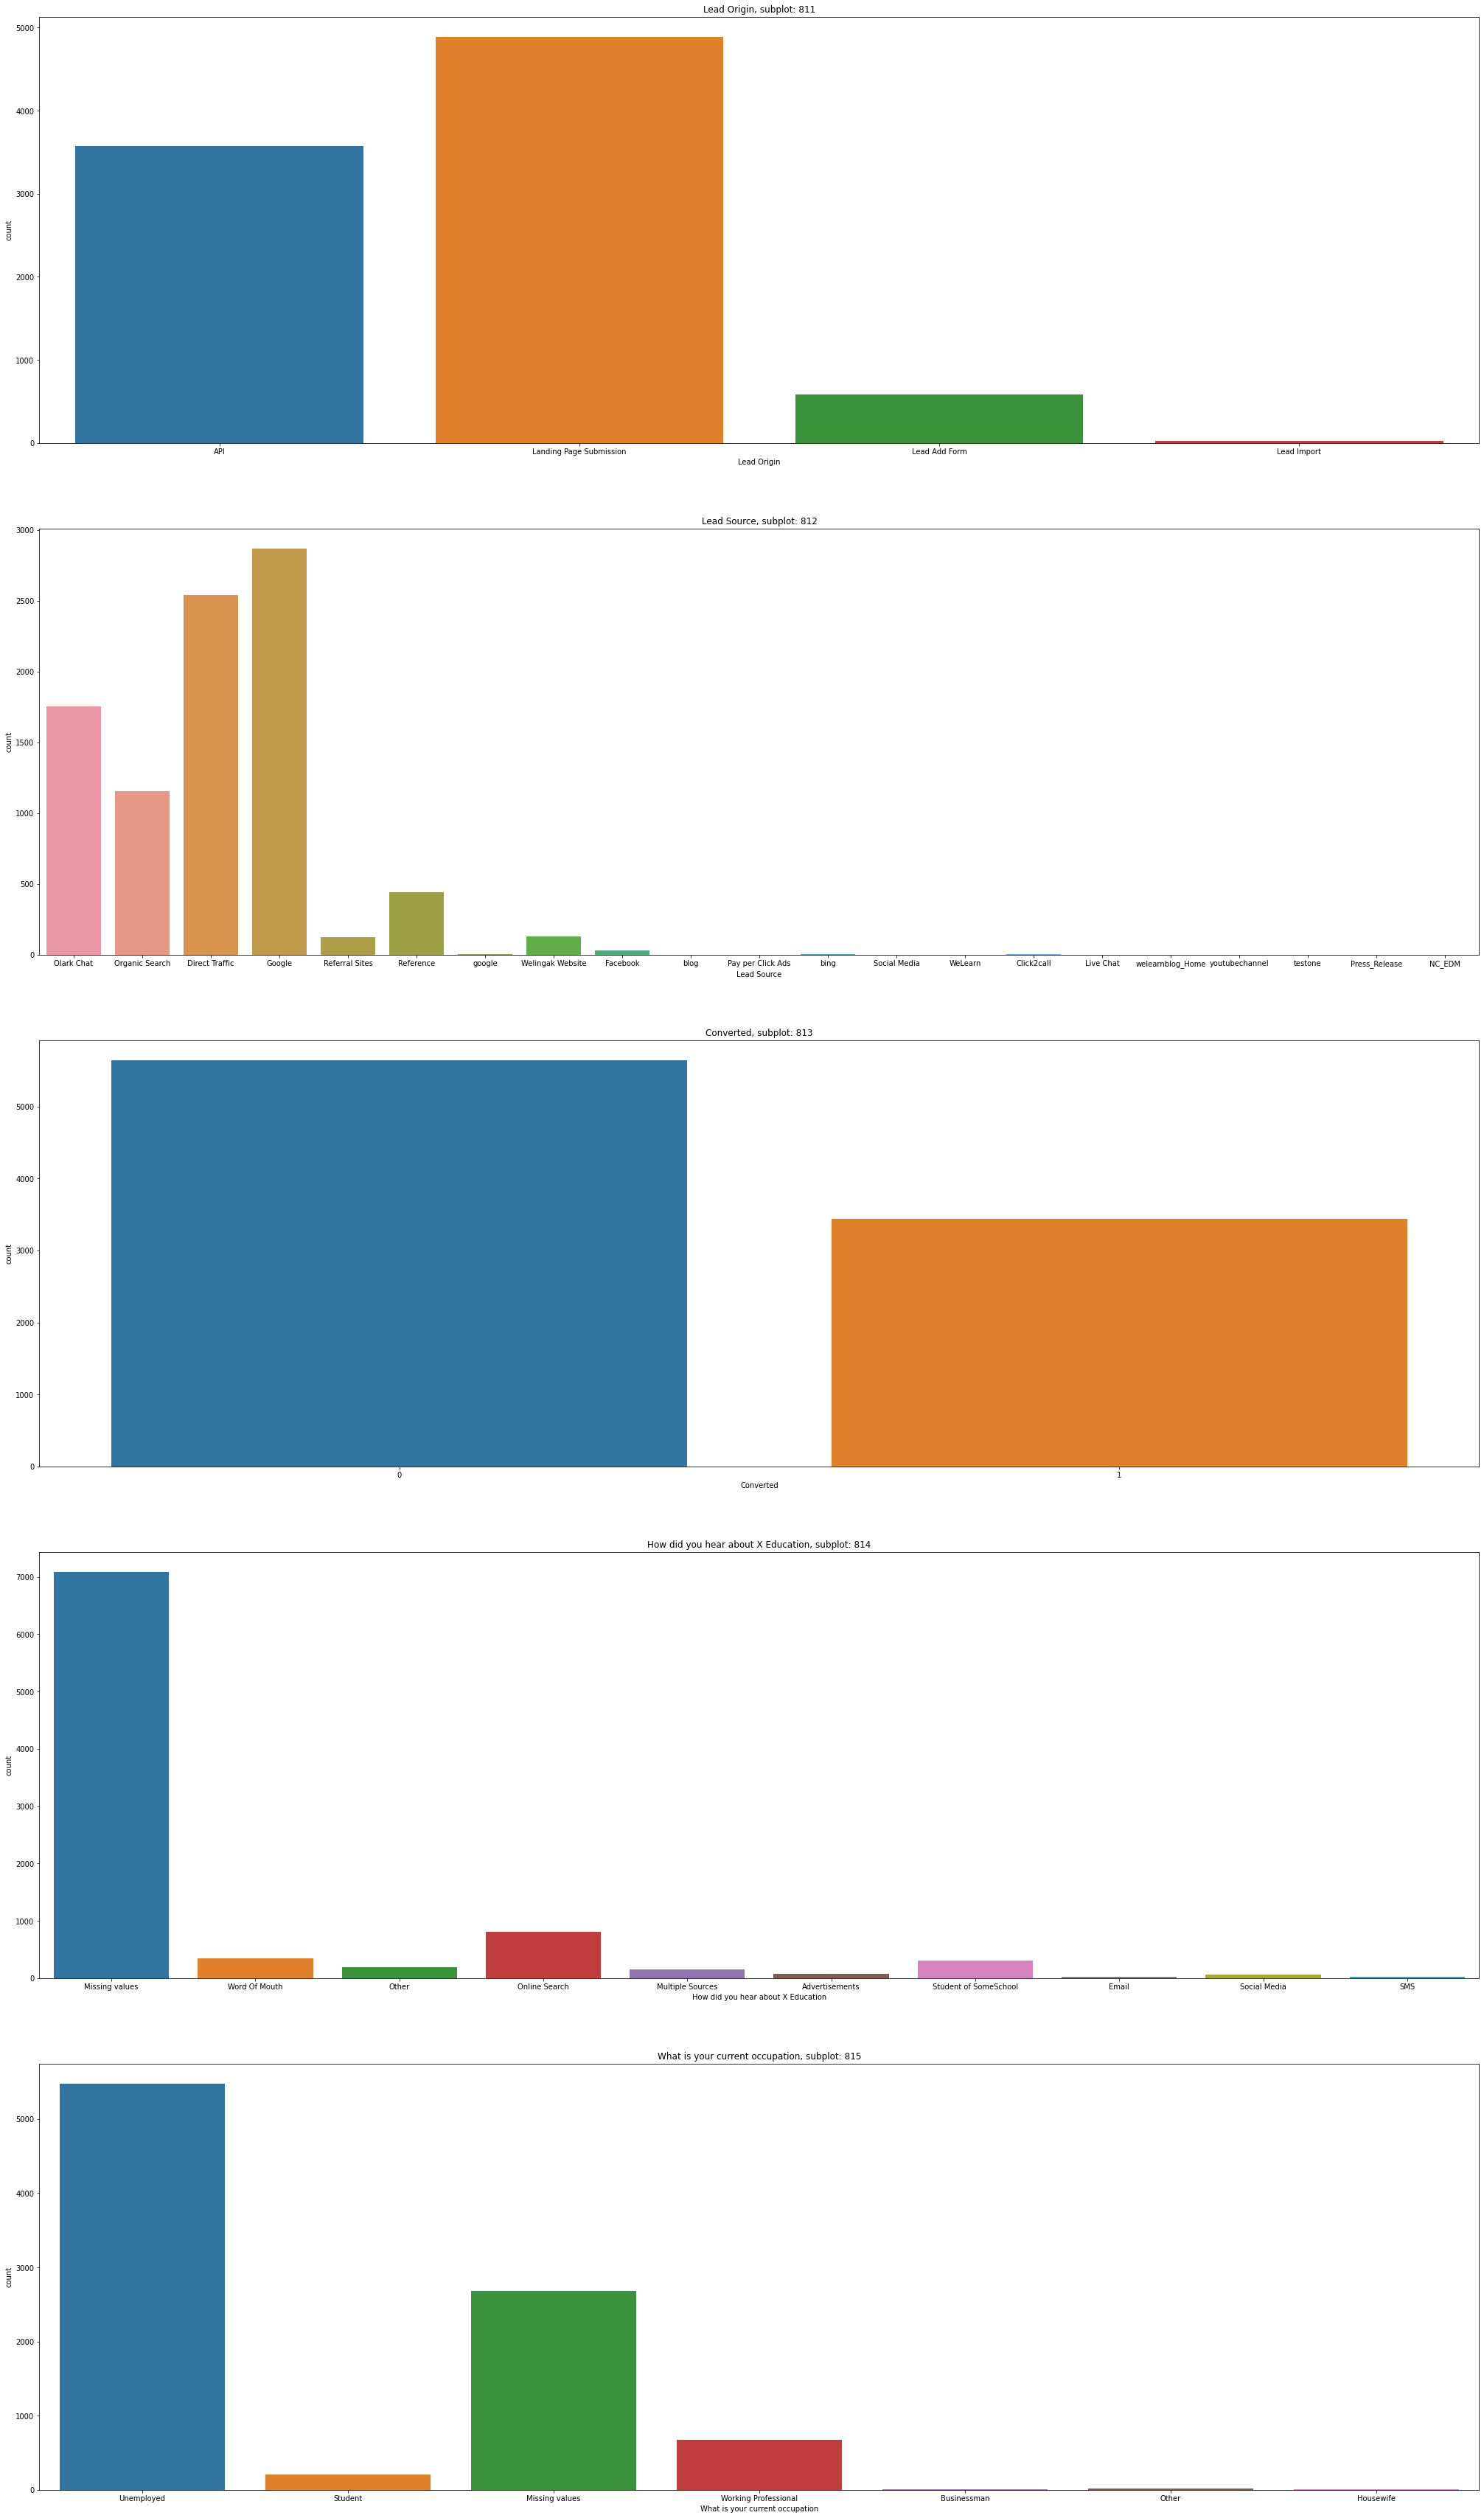

In [1013]:
dum_columns = ["Lead Origin", "Lead Source", "Converted", "How did you hear about X Education", "What is your current occupation"]
a = 8
b = 1
c = 1
fig = plt.figure(figsize=(35,100))
for i in dum_columns:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(leads_data[i])
    c = c + 1    
plt.show()

### Insights
#### Lead Origin : Most the leads have originated through "Landing Page Submission" and very least leads came through "Lead Import".
#### Lead Source : Most the leads have searched about this company through "Google", And thrpugh "Direct Traffic", "Olark Chat", and "Organic Search" have significant rate of search. the rest have almost null percentage.
#### How did you hear about X education : Most of the students did not select this option inspecialization and many did not provide any value for this .
#### What is your current Occupation : Most of the leads are "Unemployeed" and many did not provide there Occupation. Very few rate is "Working professional".
#### What matters you the most to choosing a course : Many leads have opted for "Better Career Prospects" which means as for better career purpose.
#### Lead profile: Most of the cases are "Select" which means the leads did not gave there complete profile to categorize them.
#### Last Activity : "Modified" , "Email opened", "SMS sent" have been noted as most last activity by the students.

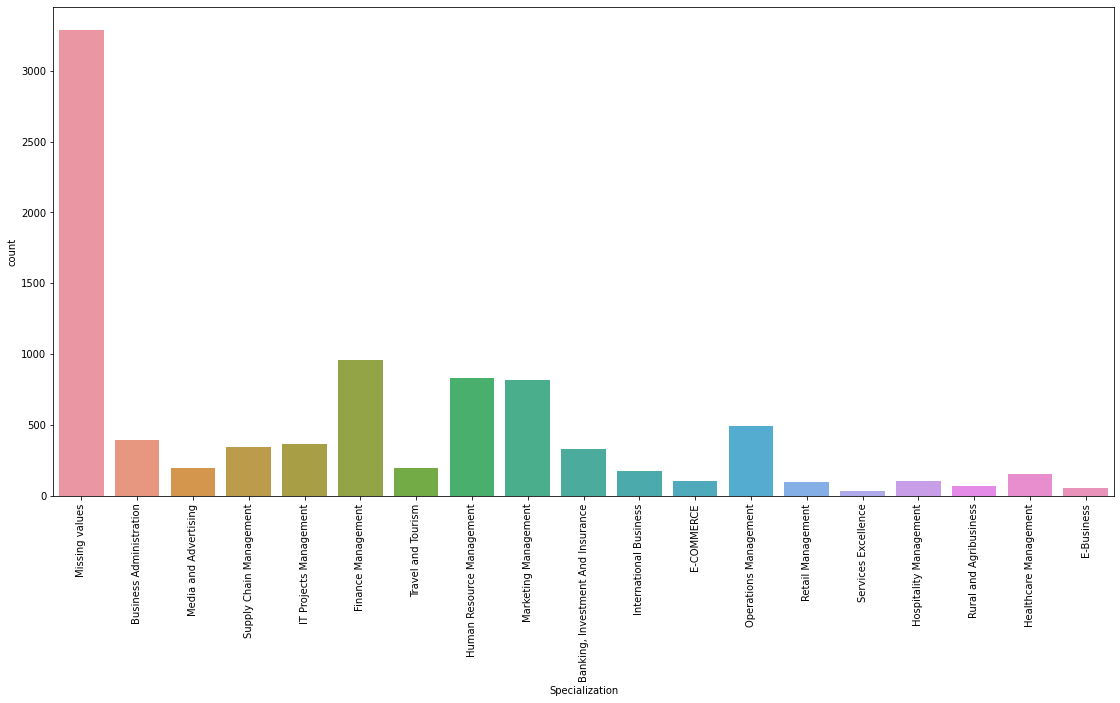

In [1014]:
plt.figure(figsize=(19,9))
sns.countplot(x=leads_data.Specialization)
plt.xticks(rotation=90)
plt.show()

#### From the above plot we can see that most of the leads did not select any specialization. most leads choose "Finance Management" as specialization.

### Bivariant analysis

#### Lets analyze the effect of each variable over conversion to hot leads.

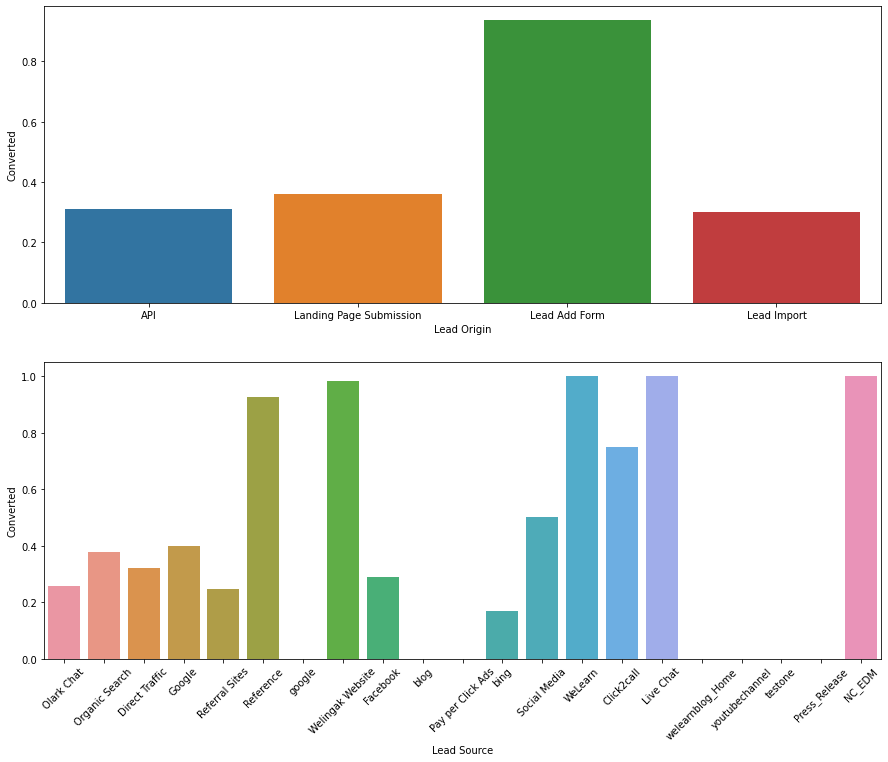

In [1015]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.barplot(x = leads_data["Lead Origin"], y = leads_data["Converted"], ci=None)
plt.subplot(2,1,2)
sns.barplot(x = leads_data["Lead Source"], y=leads_data["Converted"], ci=None)
plt.xticks(rotation=45)
plt.show()

#### Leads Originated through "Lead Add Form" have high rate of conversion into hot leads. And"API" have significantly low rate of conversion.
#### Coming to Lead source Leads who are connected to the X education through "We Learn", "Live Chata", "NC_EDM" have high rate of conversion. And leads who came with reference also have significantly high rate.

In [1]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.barplot(x = leads_data["How did you hear about X Education"], y = leads_data["Converted"], ci=None)
plt.subplot(2,1,2)
sns.barplot(x = leads_data["What is your current occupation"], y=leads_data["Converted"], ci=None)
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

### Insights
#### How did you hear about X Education : Most of the leads who knew about this X Education through email have high rate of conversion.And there are significant rate of conversion with other sources also. People who heard through SMS have low rate of conversion.
#### What is your current occupation: Surprisingly "House Wives" have high rate of conversion compared to remaining occupation. Significantly working professionals also have high rate next to house wives. Leads who are already students have low rate of conversion.
#### What matters most to you in choosing a course : Flexibility and Convienence of the course have high rate of conversion. Better Career prospects also have significant rate of conversion.
#### Lead Profile : Coming to the lead profile, leads with profile as "Dual Specialization student" and "Lateral Student" have high rate of conversion.
#### Last Notable Activity : Leads with lastly notable activity such as "Approached Upfront", "Resubscribed to emails", "email recieved", "Email marked spam" have been noted as Converted in high rate. Had a phone conversation have significantly high rate of conversion.

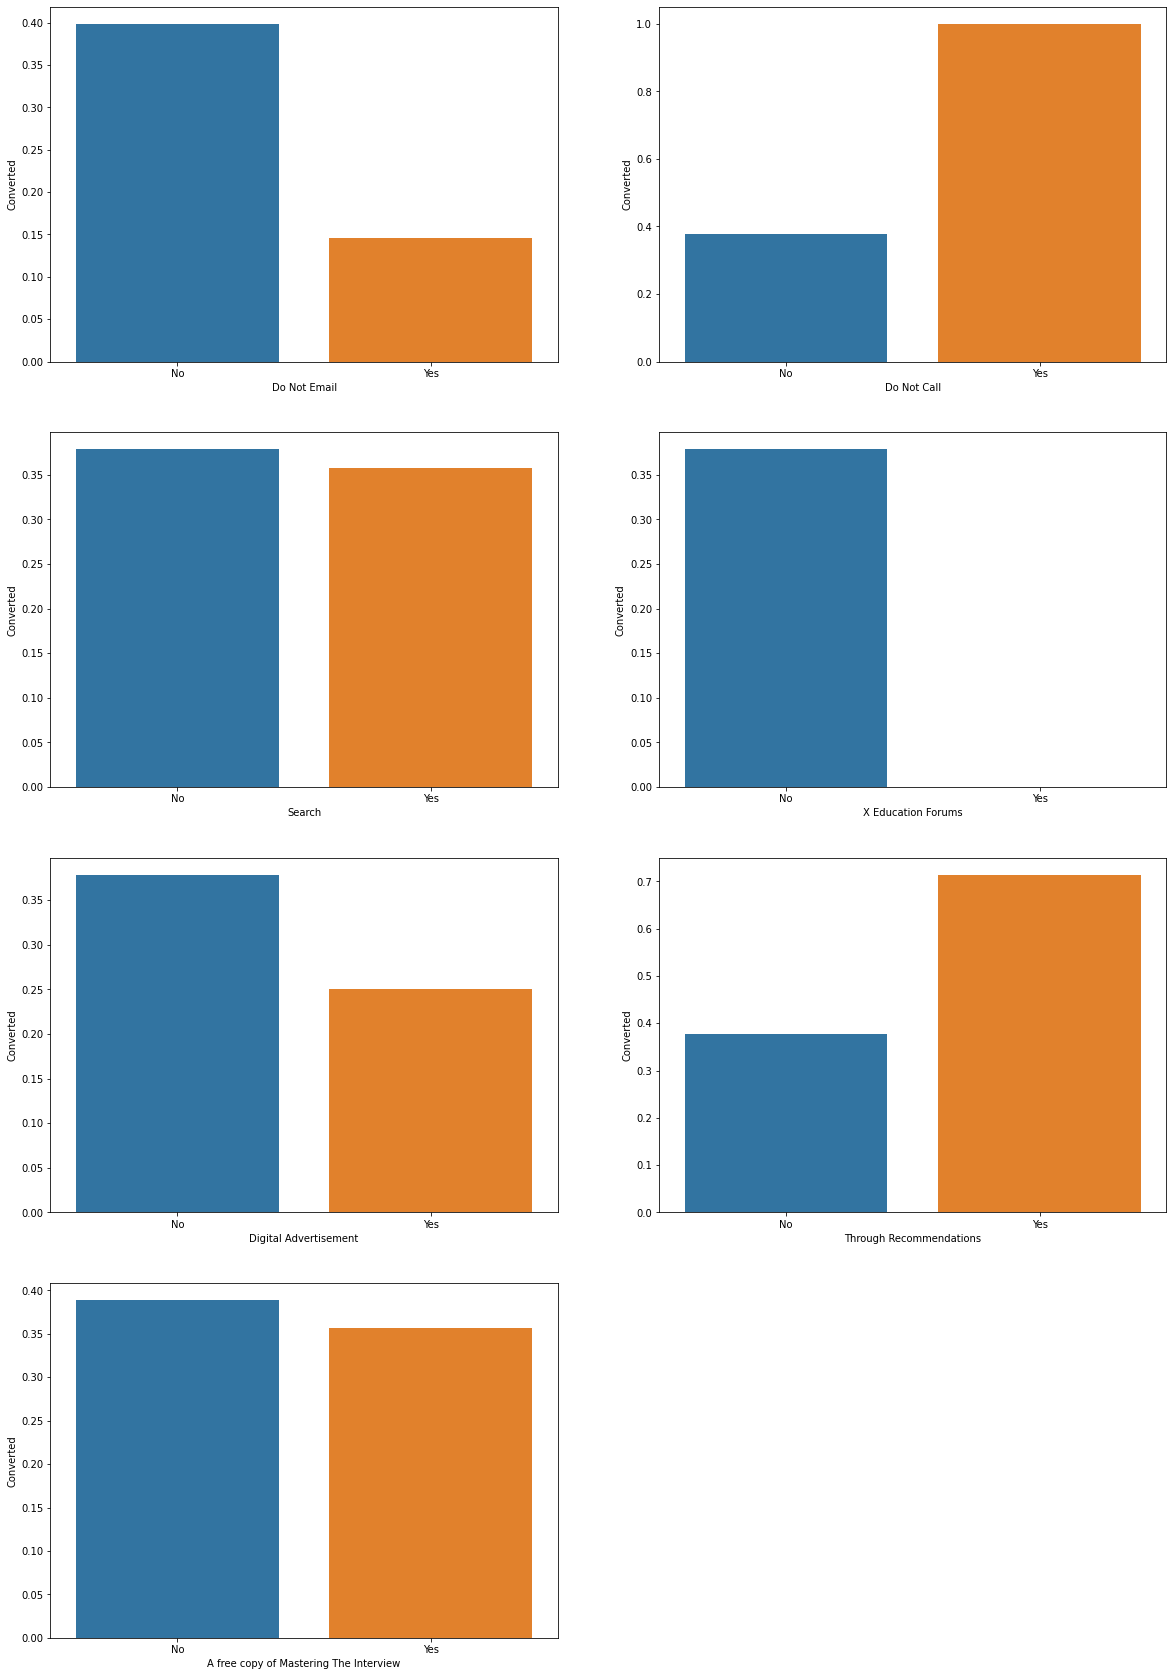

In [1017]:
cat_columns = ["Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Digital Advertisement", "Through Recommendations", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]
plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
sns.barplot(x = leads_data["Do Not Email"], y = leads_data["Converted"], ci=None)
plt.subplot(4,2,2)
sns.barplot(x = leads_data["Do Not Call"], y=leads_data["Converted"], ci=None)
plt.subplot(4,2,3)
sns.barplot(x = leads_data["Search"], y=leads_data["Converted"], ci=None)
plt.subplot(4,2,4)
sns.barplot(x = leads_data["X Education Forums"], y=leads_data["Converted"], ci=None)
plt.subplot(4,2,5)
sns.barplot(x = leads_data["Digital Advertisement"], y=leads_data["Converted"], ci=None)
plt.subplot(4,2,6)
sns.barplot(x = leads_data["Through Recommendations"], y=leads_data["Converted"], ci=None)
plt.subplot(4,2,7)
sns.barplot(x = leads_data["A free copy of Mastering The Interview"], y=leads_data["Converted"], ci=None)
plt.show()

#### Do Not Call : In this case the leads who have opted for "Yes" to access call from the Education have high rate of conversion.
#### Leads who have joined by knowing about the X education through "Newpaper", "Recommendations" have high rate of conversion.
#### In the remaining features "No" have high rate of conversion. 

### Bivariant Analysis

#### Lets check the variance of "TotalVisits" over other elements.

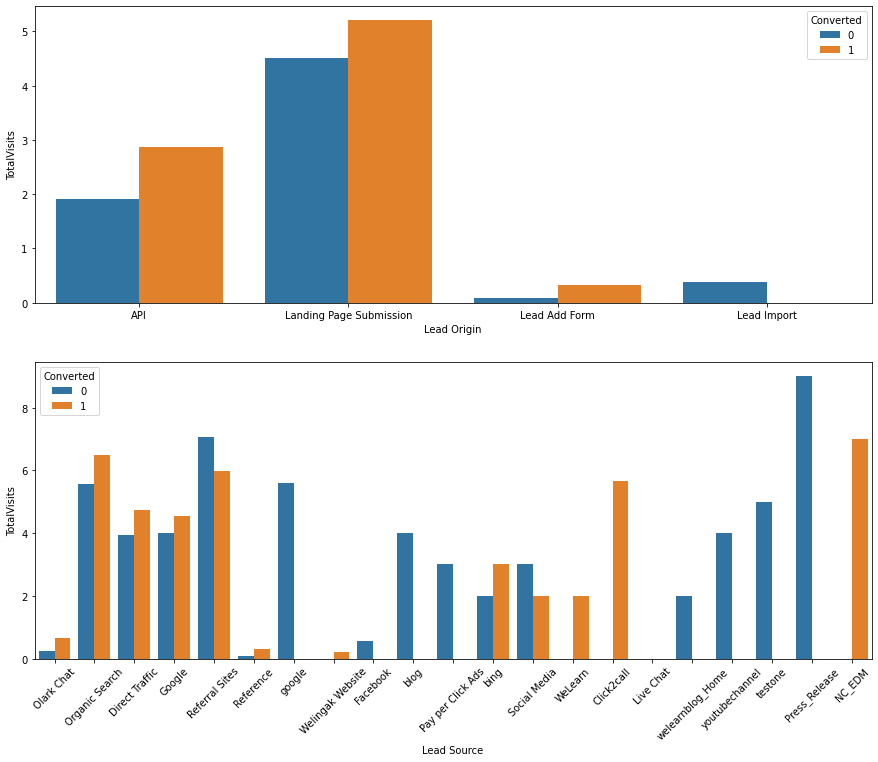

In [1097]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.barplot(x = leads_data["Lead Origin"], y = leads_data["TotalVisits"], hue = leads_data["Converted"], ci=None)
plt.subplot(2,1,2)
sns.barplot(x = leads_data["Lead Source"], y = leads_data["TotalVisits"], hue = leads_data["Converted"], ci=None)
plt.xticks(rotation=45)
plt.show()

### Insights
#### For lead origin "Landing Page Submission" have high in views and those have high rate of conversion to hot leads. And "Lead Imports" have very views and absolute 0 conversion rate. So the education should focus more on leads with origin as Landing page submission.
#### Coming to Lead Source "Referal sites" have significantly high views and also have a appreciable rate of conversion. And leads who searched through organic search have high rate of conversion and good rate of views.

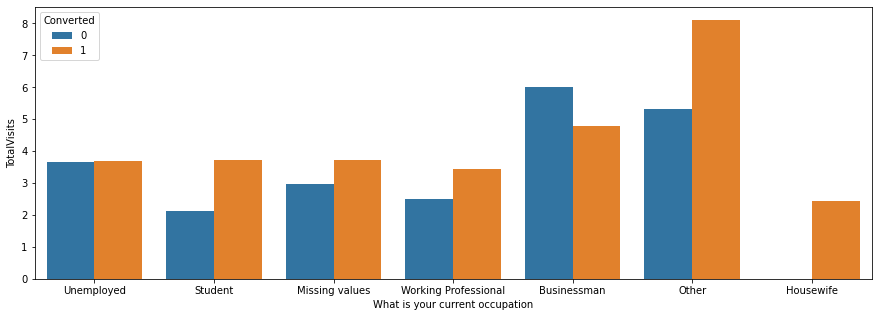

In [1099]:
plt.figure(figsize=(15,5))
sns.barplot(x = leads_data["What is your current occupation"], y = leads_data["TotalVisits"], hue = leads_data["Converted"], ci=None)
plt.show()

### Insights
#### Leads whose occupation does not belong any of the given value (i,e Others) have high rate of views and conversion. "unemployed" have almost equal rate of conversion and non-conversion with significant rate of views.

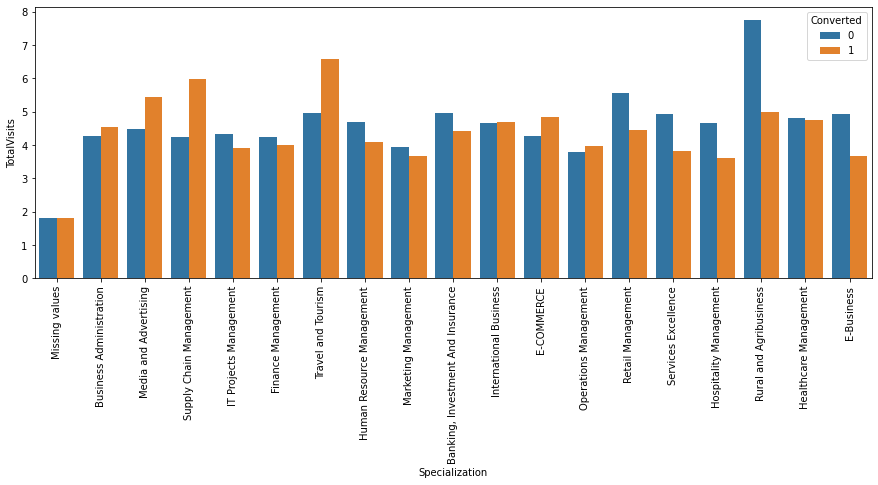

In [1102]:
plt.figure(figsize=(15,5))
sns.barplot(x = leads_data["Specialization"], y = leads_data["TotalVisits"], hue = leads_data["Converted"], ci=None)
plt.xticks(rotation=90)
plt.show()

### Insights
#### "Travel and Tourism" have high number of visits and high rate of conversion. "Rural and agribusiness" also have high rate of visits but low rate of conversion.

#### Similarly we would find out for "Time spent on website".

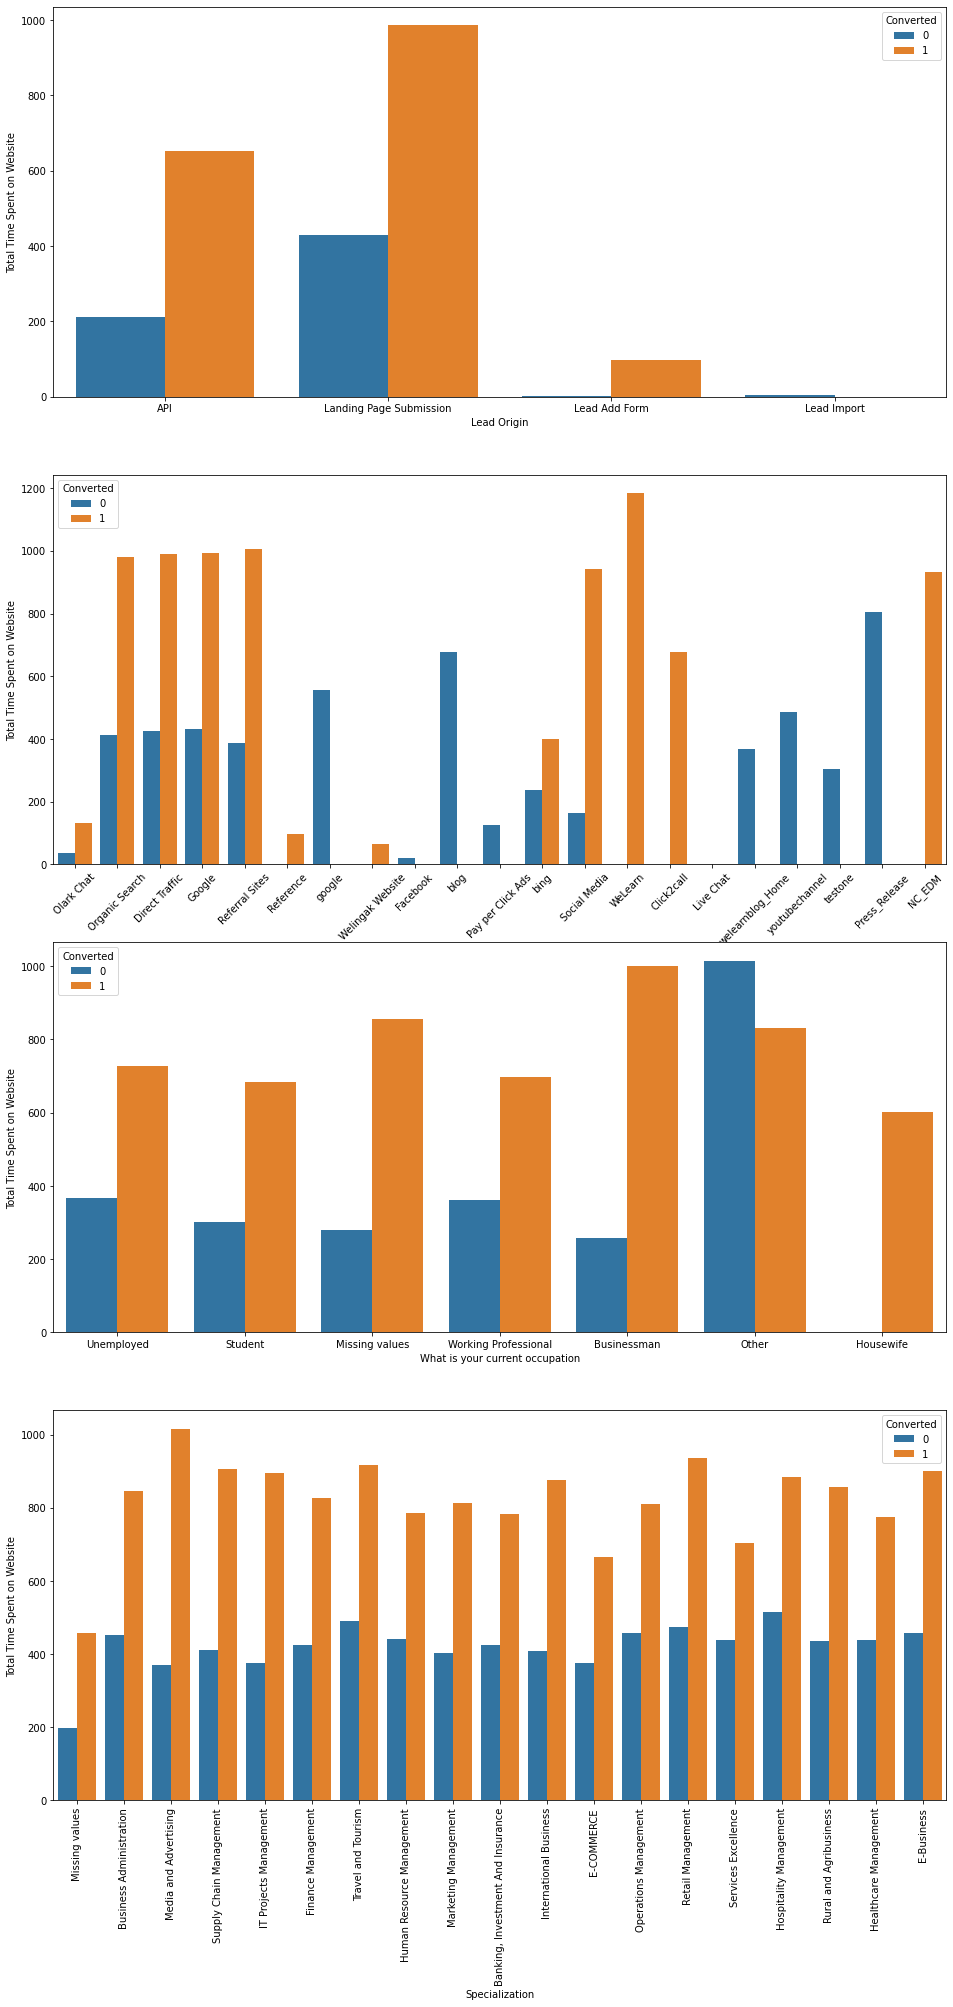

In [1110]:
plt.figure(figsize=(16,33))
plt.subplot(4,1,1)
sns.barplot(x = leads_data["Lead Origin"], y = leads_data["Total Time Spent on Website"], hue = leads_data["Converted"], ci=None)
plt.subplot(4,1,2)
sns.barplot(x = leads_data["Lead Source"], y = leads_data["Total Time Spent on Website"], hue = leads_data["Converted"], ci=None)
plt.xticks(rotation=45)
plt.subplot(4,1,3)
sns.barplot(x = leads_data["What is your current occupation"], y = leads_data["Total Time Spent on Website"], hue = leads_data["Converted"], ci=None)
plt.subplot(4,1,4)
sns.barplot(x = leads_data["Specialization"], y = leads_data["Total Time Spent on Website"], hue = leads_data["Converted"], ci=None)
plt.xticks(rotation=90)
plt.show()

### Insights
#### Lead Origin : Similarly to total visits leads who Originated through "Landing Page Submission" spent more time on th website and have hig rate of Conversion.
#### Lead Source : Leads who searched about the comapany through "Google", "We learn" ,"Referral sites", "Direct traffic", "Organic Search" have spent more time in website and have more rate of conversion.
#### What is your current occupation : The profession as Businessman and Others have spent more time but businessman have high rate of conversion.
#### Specialization : Significantly all the leads with all Specializations have mean rate of time spent on website and have significant rate of conversion. 

#### Lets check for Pages viewed.

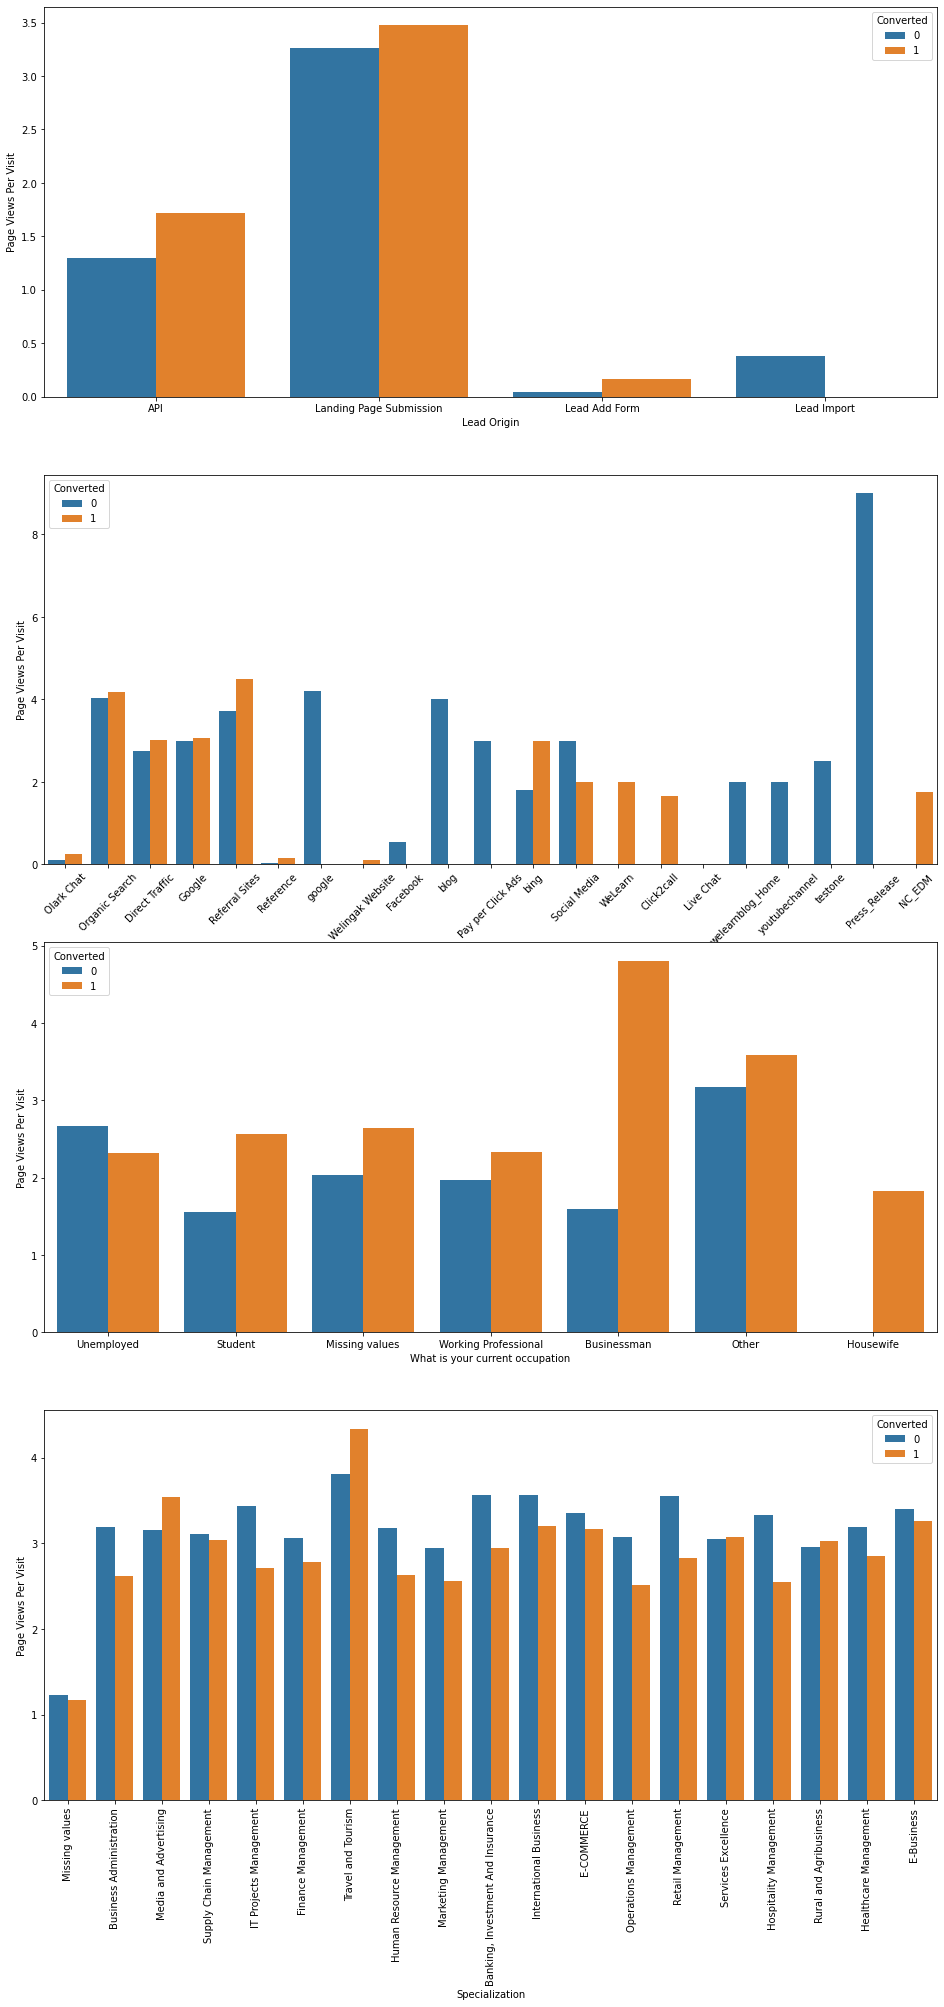

In [1111]:
plt.figure(figsize=(16,33))
plt.subplot(4,1,1)
sns.barplot(x = leads_data["Lead Origin"], y = leads_data["Page Views Per Visit"], hue = leads_data["Converted"], ci=None)
plt.subplot(4,1,2)
sns.barplot(x = leads_data["Lead Source"], y = leads_data["Page Views Per Visit"], hue = leads_data["Converted"], ci=None)
plt.xticks(rotation=45)
plt.subplot(4,1,3)
sns.barplot(x = leads_data["What is your current occupation"], y = leads_data["Page Views Per Visit"], hue = leads_data["Converted"], ci=None)
plt.subplot(4,1,4)
sns.barplot(x = leads_data["Specialization"], y = leads_data["Page Views Per Visit"], hue = leads_data["Converted"], ci=None)
plt.xticks(rotation=90)
plt.show()

### Data Preparation.

In [1018]:
c =  ['A free copy of Mastering The Interview', 'Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Search', 'Do Not Call', 'Do Not Email']
def map_col(x):
    return x.map({'Yes': 1, "No": 0})
leads_data[c] = leads_data[c].apply(map_col)

In [1019]:
leads_data.loc[:, leads_data.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'City'],
      dtype='object')

In [1020]:
dum_data = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source',
        'Specialization','How did you hear about X Education', 'What is your current occupation',
       'A free copy of Mastering The Interview']], drop_first=True)

In [1021]:
leads_data_final1 = pd.concat([leads_data, dum_data], axis = 1)
leads_data_final1.shape

(9074, 78)

In [1022]:
print(leads_data_final1.columns.tolist())

['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'City', 'A free copy of Mastering The Interview', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_g

In [1023]:
leads_data_final1 = leads_data_final1.drop(['Lead Origin', 'Lead Source',
        'Specialization','How did you hear about X Education', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Specialization_Missing values', 'How did you hear about X Education_Missing values',
                                           'What is your current occupation_Missing values', 'Country', 'City'], axis=1)

In [1024]:
leads_data_final1.shape

(9074, 66)

In [1025]:
print(leads_data_final1.columns.tolist())

['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Managem

### Model Feature Selection

In [1026]:
from sklearn.model_selection import train_test_split

In [1027]:
X = leads_data_final1.drop(["Converted", "Lead Number"], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [1028]:
y = leads_data_final1["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Dividing between training and test.

In [1029]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 64)
(2723, 64)
(6351,)
(2723,)


#### Scaling

In [1030]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


#### Conversion rate

In [1031]:
conversion_rate = (sum(leads_data_final1['Converted'])/len(leads_data_final1['Converted'].index))*100
conversion_rate

37.85541106458012

#### RFE

In [1032]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [1033]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True])

In [1034]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 48),
 ('Search', False, 42),
 ('Newspaper Article', False, 29),
 ('X Education Forums', False, 30),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 39),
 ('Through Recommendations', False, 43),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Live Chat', False, 5),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 49),
 ('Lead Source_WeLe

#### Features selected using RFE.

In [1035]:
feature_final = X_train.columns[rfe.support_]
feature_final

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'How did you hear about X Education_SMS',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Features eliminated using RFE.

In [1036]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specia

### Model Building

In [1037]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[feature_final])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.5
Date:                Sat, 15 May 2021   Deviance:                       5680.9
Time:                        18:22:37   Pearson chi2:                 6.32e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0874      0.081    -25.729      0.000      -2.246      -1.928
Do Not Email                                            -1.4936      0.165     -9.026      0.000      -1.818      -1.169
Total Time Spent on Website                              1.1492      0.039     29.266      0.000       1.072       1.226
Newspaper                                              -24.6478   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                2.0425      0.903      2.261      0.024       0.272       3.813
Lead Origin_Lead Import                                  1.1192      0.451      2.480      0.013       0.235       2.004
Lead Source_NC_EDM                                      23.7117   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.0937      0.097     11.299      0.000       0.904       1.283
Lead Source_Reference                                    1.7883      0.927      1.928      0.054      -0.029       3.606
Lead Source_Welingak Website                             3.7803      1.154      3.277      0.001       1.519       6.042
How did you hear about X Education_SMS                  -0.9938      0.723     -1.374      0.169      -2.411       0.424
What is your current occupation_Housewife               23.6679   1.56e+04      0.002      0.999   -3.06e+04    3.06e+04
What is your current occupation_Other                    1.6229      0.697      2.327      0.020       0.256       2.990
What is your current occupation_Student                  1.1796      0.215      5.493      0.000       0.759       1.601
What is your current occupation_Unemployed               1.3698      0.084     16.317      0.000       1.205       1.534
What is your current occupation_Working Professional     3.8254      0.191     19.997      0.000       3.450       4.200
========================================================================================================================
"""

#### We find few features with high p values

In [1038]:
feature_final = feature_final.drop(["What is your current occupation_Housewife", "Lead Source_Reference", "Lead Source_NC_EDM", "Newspaper", "How did you hear about X Education_SMS"])

In [1039]:
X_train_sm = sm.add_constant(X_train[feature_final])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.8
Date:                Sat, 15 May 2021   Deviance:                       5707.6
Time:                        18:22:38   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0643      0.080    -25.737      0.000      -2.222      -1.907
Do Not Email                                            -1.4918      0.165     -9.034      0.000      -1.815      -1.168
Total Time Spent on Website                              1.1446      0.039     29.260      0.000       1.068       1.221
Lead Origin_Lead Add Form                                3.8034      0.218     17.461      0.000       3.376       4.230
Lead Origin_Lead Import                                  1.1164      0.451      2.474      0.013       0.232       2.001
Lead Source_Olark Chat                                   1.0829      0.097     11.207      0.000       0.894       1.272
Lead Source_Welingak Website                             2.0175      0.749      2.695      0.007       0.550       3.485
What is your current occupation_Other                    1.6044      0.697      2.302      0.021       0.238       2.970
What is your current occupation_Student                  1.1604      0.214      5.416      0.000       0.740       1.580
What is your current occupation_Unemployed               1.3441      0.083     16.170      0.000       1.181       1.507
What is your current occupation_Working Professional     3.8042      0.191     19.936      0.000       3.430       4.178
========================================================================================================================
"""

#### We have significant values of p. lets check for VIF

#### VIF

In [1040]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1041]:
vif = pd.DataFrame()
vif['Features'] = X_train[feature_final].columns
vif['VIF'] = [variance_inflation_factor(X_train[feature_final].values, i) for i in range(X_train[feature_final].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.60
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.29
4,Lead Source_Olark Chat,1.29
8,What is your current occupation_Unemployed,1.26
9,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.05
3,Lead Origin_Lead Import,1.01
7,What is your current occupation_Student,1.01
6,What is your current occupation_Other,1.00


#### VIF values are also significant lets build the model.

#### Getting predicted values from train data.

In [1042]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:15]

3009    0.095544
1012    0.408536
9226    0.342007
4750    0.454272
7987    0.830492
1281    0.581542
2880    0.044233
4971    0.811367
7536    0.918079
1248    0.803200
1429    0.406941
2178    0.052948
8554    0.191359
5044    0.342007
3475    0.973179
dtype: float64

In [1043]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09554441, 0.40853587, 0.34200701, 0.45427166, 0.83049186,
       0.58154216, 0.04423277, 0.81136684, 0.91807866, 0.80319999])

In [1044]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.095544,3009
1,0,0.408536,1012
2,0,0.342007,9226
3,1,0.454272,4750
4,1,0.830492,7987


In [1045]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.095544,3009,0
1,0,0.408536,1012,0
2,0,0.342007,9226,0
3,1,0.454272,4750,0
4,1,0.830492,7987,1


#### Accuracy

In [1046]:
from sklearn import metrics

In [1047]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7981420248779719


### Model Evaluation.

#### Creating confusion matrix for model evaluation.

In [1048]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_mat

array([[3488,  417],
       [ 865, 1581]], dtype=int64)

In [1049]:
True_positives = confusion_mat[1,1]  
True_negatives = confusion_mat[0,0] 
False_postives = confusion_mat[0,1] 
False_negatives = confusion_mat[1,0]

#### Sensitivity

In [1050]:
True_positives/(True_positives + False_negatives)

0.6463614063777596

#### Specificity

In [1051]:
True_negatives/(True_negatives + False_postives)

0.893213828425096

#### False positive rate

In [1052]:
False_postives/(False_postives + True_negatives)

0.10678617157490397

#### Positive predictive value

In [1053]:
True_positives/(True_positives + False_postives)

0.7912912912912913

#### False predictive value

In [1054]:
True_negatives/(True_negatives + False_negatives)

0.8012864691017689

#### To evaluate the model more in detail lets plot ROC curve to analyze the evaluation metrics.

### ROC curve

In [1055]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

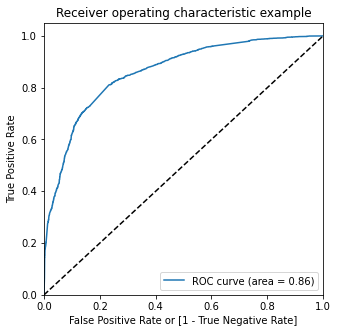

In [1056]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The Roc curve looks good. Lets find the optimal cutoff for probability of converted

In [1057]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.095544,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.408536,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.342007,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.454272,4750,0,1,1,1,1,1,0,0,0,0,0
4,1,0.830492,7987,1,1,1,1,1,1,1,1,1,1,0


In [1058]:
cutoff_df = pd.DataFrame( columns = ['Probabilty','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probabilty  Accuracy  Sensitivity  Specificity
0.0         0.0  0.385136     1.000000     0.000000
0.1         0.1  0.533617     0.984873     0.250960
0.2         0.2  0.695953     0.903925     0.565685
0.3         0.3  0.771847     0.829926     0.735467
0.4         0.4  0.801606     0.702371     0.863764
0.5         0.5  0.798142     0.646361     0.893214
0.6         0.6  0.780507     0.568275     0.913444
0.7         0.7  0.760353     0.475879     0.938540
0.8         0.8  0.735160     0.366721     0.965941
0.9         0.9  0.686034     0.194195     0.994110


#### Evaluation metrics plot

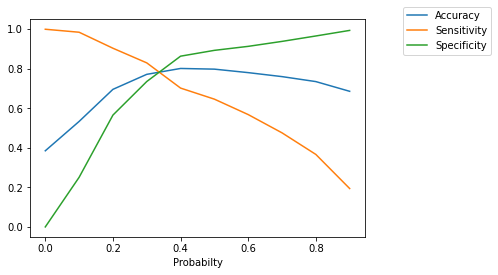

In [1059]:
cutoff_df.plot.line(x='Probabilty', y=['Accuracy','Sensitivity','Specificity'])
plt.legend(bbox_to_anchor=(1.1, 1.08))
plt.show()

#### From the above plot  we can see that the optimal cutoff for the probabilty will be around "0.3".

In [1060]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.31 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.095544,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.408536,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.342007,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.454272,4750,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.830492,7987,1,1,1,1,1,1,1,1,1,1,0,1


#### Similarly for this cutoff lets evaluate the model.

#### Accuracy

In [1061]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.7773578963942687


In [1062]:
confusion_mat_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion_mat_final

array([[2925,  980],
       [ 434, 2012]], dtype=int64)

In [1063]:
True_positives = confusion_mat_final[1,1]  
True_negatives = confusion_mat_final[0,0] 
False_postives = confusion_mat_final[0,1] 
False_negatives = confusion_mat_final[1,0]

#### Sensitivity

In [1064]:
True_positives/(True_positives + False_negatives)

0.8225674570727719

#### Specificity

In [1065]:
True_negatives/(True_negatives + False_postives)

0.7490396927016645

#### False positive rate

In [1066]:
False_postives/(False_postives + True_negatives)

0.25096030729833546

#### Positive predictive value

In [1067]:
True_positives/(True_positives + False_postives)

0.6724598930481284

#### False predictive value

In [1068]:
True_negatives/(True_negatives + False_negatives)

0.8707948794284013

#### Now lets deal with "Precision" and "Recall".

In [1069]:
confusion_pr = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_pr

array([[3488,  417],
       [ 865, 1581]], dtype=int64)

In [1070]:
True_positives = confusion_pr[1,1]  
True_negatives = confusion_pr[0,0] 
False_postives = confusion_pr[0,1] 
False_negatives = confusion_pr[1,0]

#### Precision

In [1071]:
True_positives/(True_positives + False_postives)

0.7912912912912913

#### Recall

In [1072]:
True_positives/(True_positives + False_negatives)

0.6463614063777596

#### Using Sklearn to find to fid precision and recall

In [1073]:
from sklearn.metrics import precision_recall_curve

In [1074]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [1075]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

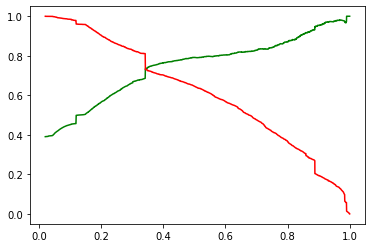

In [1076]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Predictions on test data set. 

#### Transform scaling

In [1077]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3271,0,0,0.102194,-0.600595,0.773206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.295588,1.887326,1.249642,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7936,0,0,-0.284595,-0.752879,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3830,0,0,0.875771,-0.587751,2.678951,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### We transform the model on to test data.

In [1078]:
X_test_sm = sm.add_constant(X_test[feature_final])

In [1079]:
y_test_pred = result.predict(X_test_sm)

In [1080]:
y_test_pred[:10]

3271    0.059988
1490    0.980162
7936    0.050881
4216    0.867883
3830    0.060822
1800    0.707315
6507    0.187489
4821    0.424312
4223    0.887564
4714    0.119360
dtype: float64

In [1081]:
y_pred_test = pd.DataFrame(y_test_pred)
y_pred_test.head()

,0
3271,0.059988
1490,0.980162
7936,0.050881
4216,0.867883
3830,0.060822


In [1082]:
y_test_df = pd.DataFrame(y_test)

In [1083]:
y_test_df['Lead Number'] = y_test_df.index

In [1084]:
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1085]:
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)

In [1086]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.059988
1,1,1490,0.980162
2,0,7936,0.050881
3,1,4216,0.867883
4,0,3830,0.060822


In [1087]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,3271,0.059988
1,1,1490,0.980162
2,0,7936,0.050881
3,1,4216,0.867883
4,0,3830,0.060822


In [1088]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.31 else 0)

In [1089]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,Final_Predicted
0,0,3271,0.059988,0
1,1,1490,0.980162,1
2,0,7936,0.050881,0
3,1,4216,0.867883,1
4,0,3830,0.060822,0


#### Accuracy

In [1090]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7712082262210797

In [1091]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion_test

array([[1295,  439],
       [ 184,  805]], dtype=int64)

In [1092]:
True_positives = confusion_test[1,1]  
True_negatives = confusion_test[0,0] 
False_postives = confusion_test[0,1] 
False_negatives = confusion_test[1,0]

#### Sensitivity

In [1093]:
True_positives/(True_positives + False_negatives)

0.813953488372093

#### Specificity

In [1094]:
True_negatives/(True_negatives + False_postives)

0.7468281430219147

In [1095]:
Leads_Score=pd.DataFrame({'Lead Number':y_pred_final['Lead Number'].values,'Converted_Prob':y_pred_final['Converted_Prob'].values})
Leads_Score['Score %']=Leads_Score['Converted_Prob']*100
Leads_Score

,Lead Number,Converted_Prob,Score %
0,3271,0.059988,5.998812
1,1490,0.980162,98.016170
2,7936,0.050881,5.088087
3,4216,0.867883,86.788255
4,3830,0.060822,6.082244
...,...,...,...
2718,850,0.207422,20.742211
2719,2879,0.377447,37.744688
2720,6501,0.707337,70.733666
2721,7155,0.119209,11.920922
